In [1]:
import pandas as pd

In [2]:
!dir

 Volume in drive C is OS
 Volume Serial Number is 4244-7F65

 Directory of C:\Users\NEHA\Desktop\dm

04/27/2018  07:43 PM    <DIR>          .
04/27/2018  07:43 PM    <DIR>          ..
04/27/2018  07:43 PM    <DIR>          .ipynb_checkpoints
04/04/2018  11:30 PM           250,774 Assignment2-Technical Report.docx
04/03/2018  10:03 PM            90,777 Assignment2.docx
03/11/2018  07:18 PM            14,582 business_case_study.docx
02/20/2018  05:08 PM            67,582 Class2-Regresssion-Example2-iris_data_XLS.xlsx
04/04/2018  10:14 AM            46,213 cost_analysis_50_50.png
04/04/2018  10:12 AM            47,830 cost_analysis_full_training.png
04/01/2018  10:22 PM            47,819 cost_beneifit_analysis.png
03/11/2018  05:31 PM            38,755 Data Mining Business Opportunity Writeup.docx
04/11/2018  11:02 AM            37,443 diabetes.arff
04/01/2018  10:33 PM               540 diabetes.R
04/01/2018  08:30 PM            36,140 Diabetes_OrgData.csv
04/01/2018  08:27 PM           

In [3]:
data=pd.read_csv("energydata_complete.csv")

In [4]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [39]:
data['date']=pd.to_datetime(data['date'], infer_datetime_format=True)
mask1 = (data['date']>=pd.to_datetime("2016-01-12 00:00:00",infer_datetime_format=True))&(data['date']<=pd.to_datetime("2016-01-12 03:00:00",infer_datetime_format=True))

In [14]:
data['only date'] = data['date'].apply(lambda x:x.split(' ')[0])

In [8]:
data['hour'] = data['date'].apply(lambda x: x.split(' ')[1])

In [9]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,only date,hour
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016-01-11,17:00:00
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016-01-11,17:10:00
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016-01-11,17:20:00
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016-01-11,17:30:00
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016-01-11,17:40:00


In [11]:
data['hour'] = pd.to_datetime(data['hour'], infer_datetime_format=True)

In [12]:
data['only date'] = pd.to_datetime(data['only date'], infer_datetime_format= True)

In [22]:
data[data['only date']=='2016-01-11'].tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,only date,hour
37,2016-01-11 23:10:00,60,20,21.60,44.200000,21.000000,43.590,20.39,45.663333,21.033333,...,5.8,736.4,87.833333,6.833333,37.0,3.85,5.397181,5.397181,2016-01-11,2018-04-27 23:10:00
38,2016-01-11 23:20:00,50,10,21.60,44.200000,21.000000,43.700,20.29,45.730000,20.963333,...,5.7,736.5,88.666667,6.666667,34.0,3.90,36.185547,36.185547,2016-01-11,2018-04-27 23:20:00
39,2016-01-11 23:30:00,70,20,21.50,44.230000,20.926667,43.760,20.29,45.790000,20.865000,...,5.6,736.6,89.500000,6.500000,31.0,3.95,20.563721,20.563721,2016-01-11,2018-04-27 23:30:00
40,2016-01-11 23:40:00,60,20,21.50,44.363333,20.890000,43.845,20.29,45.790000,20.730000,...,5.5,736.7,90.333333,6.333333,28.0,4.00,41.047315,41.047315,2016-01-11,2018-04-27 23:40:00
41,2016-01-11 23:50:00,40,20,21.39,44.433333,20.790000,43.790,20.23,45.656667,20.700000,...,5.4,736.8,91.166667,6.166667,25.0,4.05,32.353010,32.353010,2016-01-11,2018-04-27 23:50:00


In [30]:
data.drop(data.index[0:42], inplace=True)

In [31]:
data = data.reset_index(drop = True)

In [40]:
data[mask1]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,only date,hour
0,2016-01-12 00:00:00,40,10,21.390000,44.560000,20.790000,43.863333,20.200000,45.663333,20.633333,...,5.300000,736.900000,92.0,6.000000,22.0,4.100000,39.146638,39.146638,2016-01-12,2018-04-27 00:00:00
1,2016-01-12 00:10:00,30,20,21.290000,44.826667,20.700000,44.000000,20.200000,45.590000,20.566667,...,5.266667,737.000000,92.0,6.000000,25.0,4.066667,27.651816,27.651816,2016-01-12,2018-04-27 00:10:00
2,2016-01-12 00:20:00,40,20,21.290000,44.966667,20.633333,44.000000,20.166667,45.500000,20.500000,...,5.233333,737.100000,92.0,6.000000,28.0,4.033333,26.485979,26.485979,2016-01-12,2018-04-27 00:20:00
3,2016-01-12 00:30:00,50,20,21.260000,45.090000,20.600000,44.030000,20.100000,45.500000,20.500000,...,5.200000,737.200000,92.0,6.000000,31.0,4.000000,39.467812,39.467812,2016-01-12,2018-04-27 00:30:00
4,2016-01-12 00:40:00,310,10,21.200000,45.090000,20.600000,44.090000,20.100000,45.500000,20.426667,...,5.166667,737.300000,92.0,6.000000,34.0,3.966667,1.166560,1.166560,2016-01-12,2018-04-27 00:40:00
5,2016-01-12 00:50:00,380,20,21.166667,45.230000,20.500000,44.126667,20.100000,45.500000,20.460000,...,5.133333,737.400000,92.0,6.000000,37.0,3.933333,23.861503,23.861503,2016-01-12,2018-04-27 00:50:00
6,2016-01-12 01:00:00,380,20,21.075000,45.372500,20.500000,44.200000,20.100000,45.530000,20.793333,...,5.100000,737.500000,92.0,6.000000,40.0,3.900000,36.615687,36.615687,2016-01-12,2018-04-27 01:00:00
7,2016-01-12 01:10:00,370,20,21.000000,45.400000,20.390000,44.200000,20.100000,45.590000,21.263333,...,5.116667,737.633333,92.0,5.833333,40.0,3.916667,34.636578,34.636578,2016-01-12,2018-04-27 01:10:00
8,2016-01-12 01:20:00,120,10,21.000000,45.590000,20.390000,44.260000,20.100000,45.590000,21.596667,...,5.133333,737.766667,92.0,5.666667,40.0,3.933333,23.880981,23.880981,2016-01-12,2018-04-27 01:20:00
9,2016-01-12 01:30:00,50,0,20.926667,45.590000,20.290000,44.290000,20.166667,45.530000,21.890000,...,5.150000,737.900000,92.0,5.500000,40.0,3.950000,43.060474,43.060474,2016-01-12,2018-04-27 01:30:00


In [48]:
start_date_1 = []
end_date_1 =[]
start_date_2 = []
end_date_2 =[]
start_date_3 = []
end_date_3 = []
start_date_4 = []
end_date_4 =[]
start_date_5 = []
end_date_5 =[]
start_date_6 = []
end_date_6 =[]
start_date_7 = []
end_date_7 =[]
start_date_8 = []
end_date_8 =[]
zero_to_three = []
three_to_six =[]
six_to_nine =[]
nine_to_twelve = []
twelve_to_fifteen = []
fifteen_to_eighteen = []
eighteen_to_twentyone = []
twentyone_to_twentyfour = []

for date in set(data['only date']):
    data_temp = data[data['only date']==date]
    zero_to_three.append(data_temp[(data_temp['hour']>=pd.to_datetime("00:00:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("03:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_1.append(date+" 00:00:00")
    end_date_1.append(date+" 03:00:00")
    three_to_six.append(data_temp[(data_temp['hour']>=pd.to_datetime("03:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("06:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_2.append(date+" 03:10:00")
    end_date_2.append(date+" 06:00:00")
    six_to_nine.append(data_temp[(data_temp['hour']>=pd.to_datetime("06:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("09:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_3.append(date+" 06:10:00")
    end_date_3.append(date+" 09:00:00")
    nine_to_twelve.append(data_temp[(data_temp['hour']>=pd.to_datetime("09:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("12:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_4.append(date+" 09:10:00")
    end_date_4.append(date+" 12:00:00")
    twelve_to_fifteen.append(data_temp[(data_temp['hour']>=pd.to_datetime("12:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("15:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_5.append(date+" 12:10:00")
    end_date_5.append(date+" 15:00:00")
    fifteen_to_eighteen.append(data_temp[(data_temp['hour']>=pd.to_datetime("15:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("18:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_6.append(date+" 15:10:00")
    end_date_6.append(date+" 18:00:00")
    eighteen_to_twentyone.append(data_temp[(data_temp['hour']>=pd.to_datetime("18:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("21:00:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_7.append(date+" 18:10:00")
    end_date_7.append(date+" 21:00:00")
    twentyone_to_twentyfour.append(data_temp[(data_temp['hour']>=pd.to_datetime("21:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("23:50:00", infer_datetime_format=True))]["Appliances"].sum())
    start_date_8.append(date+" 21:10:00")
    end_date_8.append(date+" 23:50:00")

In [69]:
zero = pd.DataFrame()
one = pd.DataFrame()
two = pd.DataFrame()
three = pd.DataFrame()
four = pd.DataFrame()
five = pd.DataFrame()
six = pd.DataFrame()
seven = pd.DataFrame()

zero['Start Date']=start_date_1
zero['End Date'] = end_date_1
zero['Energy'] = zero_to_three
zero['T_Out'] = zero_to_three_av
one['Start Date']=start_date_2
one['End Date'] = end_date_2
one['Energy'] = three_to_six
one['T_Out'] = three_to_six_av
two['Start Date']=start_date_3
two['End Date'] = end_date_3
two['Energy'] = six_to_nine
two['T_Out'] = six_to_nine_av
three['Start Date']=start_date_4
three['End Date'] = end_date_4
three['Energy'] = nine_to_twelve
three['T_Out'] = nine_to_twelve_av
four['Start Date']=start_date_5
four['End Date'] = end_date_5
four['Energy'] = twelve_to_fifteen
four['T_Out'] = twelve_to_fifteen_av
five['Start Date']=start_date_6
five['End Date'] = end_date_6
five['Energy'] = fifteen_to_eighteen
five['T_Out'] = fifteen_to_eighteen_av
six['Start Date']=start_date_7
six['End Date'] = end_date_7
six['Energy'] = eighteen_to_twentyone
six['T_Out'] = eighteen_to_twentyone_av
seven['Start Date']=start_date_8
seven['End Date'] = end_date_8
seven['Energy'] = twentyone_to_twentyfour
seven['T_Out'] = twentyone_to_twentyfour_av

In [70]:
final_data = zero.append(one.append(two.append(three.append(four.append(five.append(six.append(seven)))))))

In [71]:
final_data.sort_values(['Start Date'], inplace=True)

In [82]:
final_data.to_csv("final data.csv")

In [80]:
final_data = final_data.reset_index(drop=True)

In [65]:
import matplotlib.pyplot as plt


In [76]:
final_data.index = final_data['Start Date']

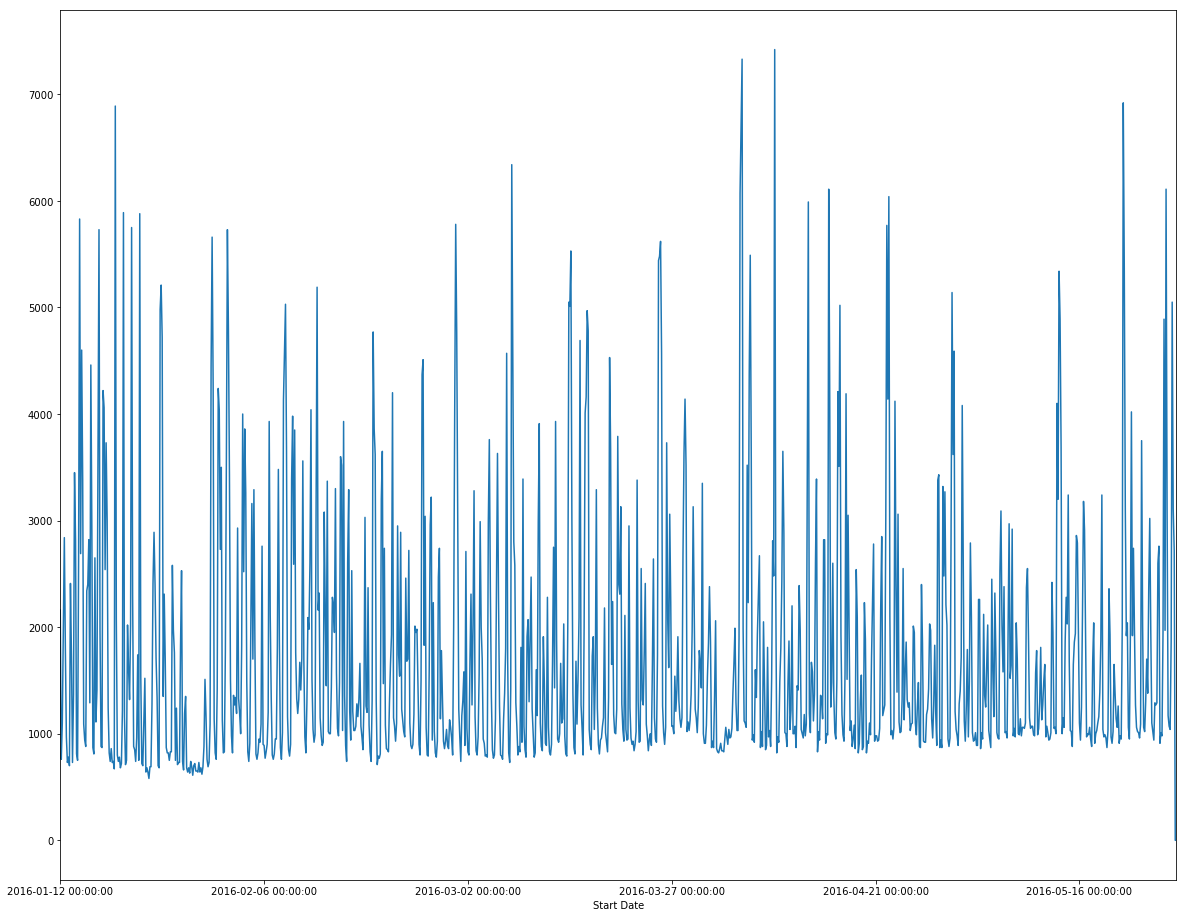

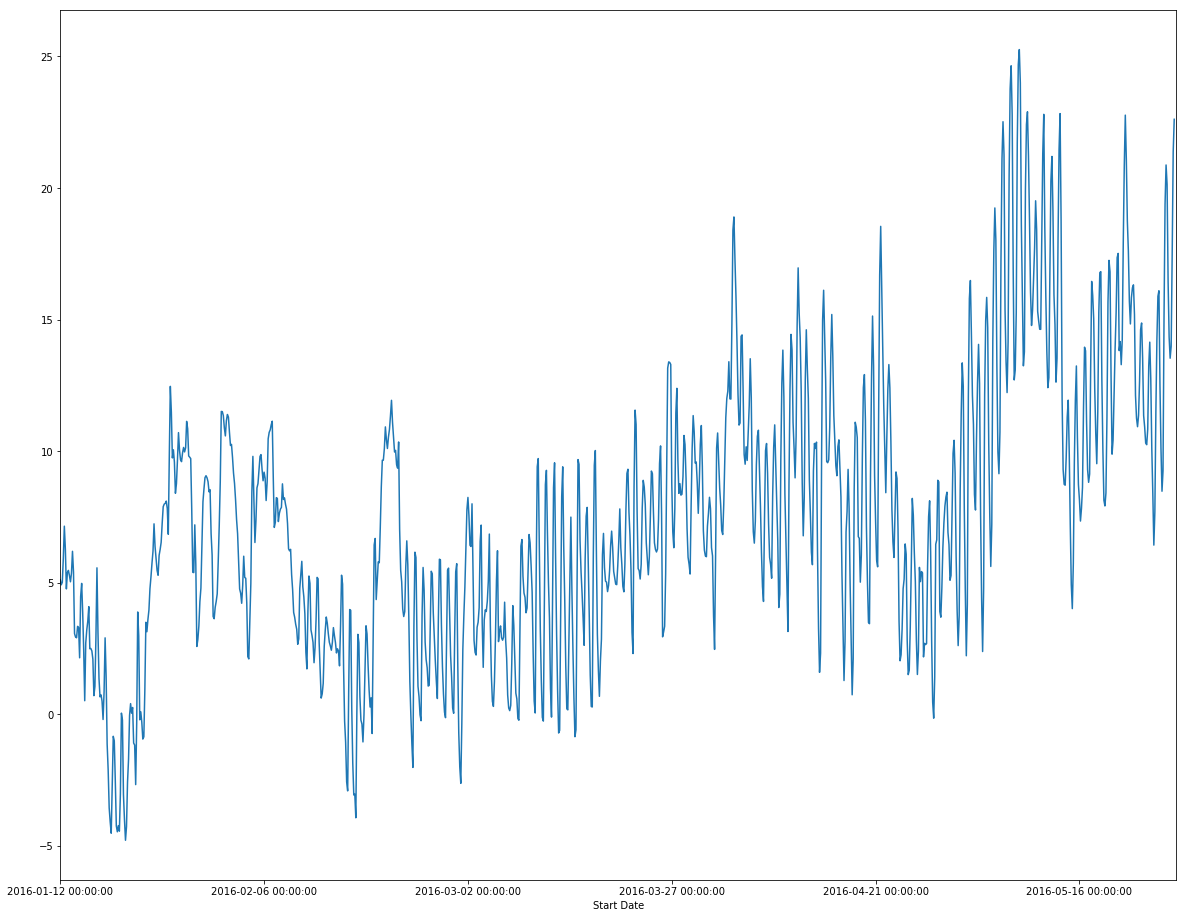

In [79]:
final_data.Energy.plot(figsize=(20,16))

plt.show()
final_data['T_Out'].plot(figsize=(20,16))
plt.show()

In [68]:
start_date_1 = []
end_date_1 =[]
start_date_2 = []
end_date_2 =[]
start_date_3 = []
end_date_3 = []
start_date_4 = []
end_date_4 =[]
start_date_5 = []
end_date_5 =[]
start_date_6 = []
end_date_6 =[]
start_date_7 = []
end_date_7 =[]
start_date_8 = []
end_date_8 =[]
zero_to_three = []
three_to_six =[]
six_to_nine =[]
nine_to_twelve = []
twelve_to_fifteen = []
fifteen_to_eighteen = []
eighteen_to_twentyone = []
twentyone_to_twentyfour = []
zero_to_three_av = []
three_to_six_av =[]
six_to_nine_av =[]
nine_to_twelve_av = []
twelve_to_fifteen_av = []
fifteen_to_eighteen_av = []
eighteen_to_twentyone_av = []
twentyone_to_twentyfour_av = []

only_date = set(data['only date'])
attr = ['T_out']

for date in only_date :
    data_temp = data[data['only date']==date]
    zero_to_three.append(data_temp[(data_temp['hour']>=pd.to_datetime("00:00:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("03:00:00", infer_datetime_format=True))]["Appliances"].sum())
    zero_to_three_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("00:00:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("03:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_1.append(date+" 00:00:00")
    end_date_1.append(date+" 03:00:00")
    three_to_six.append(data_temp[(data_temp['hour']>=pd.to_datetime("03:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("06:00:00", infer_datetime_format=True))]["Appliances"].sum())
    three_to_six_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("03:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("06:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_2.append(date+" 03:10:00")
    end_date_2.append(date+" 06:00:00")
    six_to_nine.append(data_temp[(data_temp['hour']>=pd.to_datetime("06:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("09:00:00", infer_datetime_format=True))]["Appliances"].sum())
    six_to_nine_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("06:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("09:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_3.append(date+" 06:10:00")
    end_date_3.append(date+" 09:00:00")
    nine_to_twelve.append(data_temp[(data_temp['hour']>=pd.to_datetime("09:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("12:00:00", infer_datetime_format=True))]["Appliances"].sum())
    nine_to_twelve_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("09:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("12:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_4.append(date+" 09:10:00")
    end_date_4.append(date+" 12:00:00")
    twelve_to_fifteen.append(data_temp[(data_temp['hour']>=pd.to_datetime("12:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("15:00:00", infer_datetime_format=True))]["Appliances"].sum())
    twelve_to_fifteen_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("12:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("15:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_5.append(date+" 12:10:00")
    end_date_5.append(date+" 15:00:00")
    fifteen_to_eighteen.append(data_temp[(data_temp['hour']>=pd.to_datetime("15:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("18:00:00", infer_datetime_format=True))]["Appliances"].sum())
    fifteen_to_eighteen_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("15:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("18:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_6.append(date+" 15:10:00")
    end_date_6.append(date+" 18:00:00")
    eighteen_to_twentyone.append(data_temp[(data_temp['hour']>=pd.to_datetime("18:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("21:00:00", infer_datetime_format=True))]["Appliances"].sum())
    eighteen_to_twentyone_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("18:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("21:00:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_7.append(date+" 18:10:00")
    end_date_7.append(date+" 21:00:00")
    twentyone_to_twentyfour.append(data_temp[(data_temp['hour']>=pd.to_datetime("21:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("23:50:00", infer_datetime_format=True))]["Appliances"].sum())
    twentyone_to_twentyfour_av.append(data_temp[(data_temp['hour']>=pd.to_datetime("21:10:00", infer_datetime_format=True))&(data_temp['hour']<=pd.to_datetime("23:50:00", infer_datetime_format=True))]["T_out"].mean())
    start_date_8.append(date+" 21:10:00")
    end_date_8.append(date+" 23:50:00")
